# titanic 생존율 구분하기
결측치 추가로 보기

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.metrics import *
from pandas import DataFrame,Series

plt.style.use("seaborn")
sns.set(font_scale=1.5)

In [2]:
df_train=pd.read_csv("train.csv")
df_test=pd.read_csv("test.csv")

In [3]:
df_train.shape,df_test.shape

((891, 12), (418, 11))

In [4]:
columns=df_train.columns
columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
df_train["Survived"].value_counts()
# survived 컬럼의 데이터 수

0    549
1    342
Name: Survived, dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

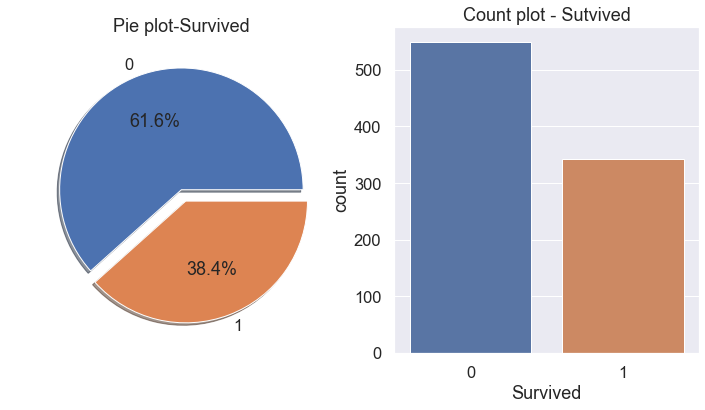

In [6]:
f,ax=plt.subplots(1,2,figsize=(12,6))
df_train["Survived"].value_counts().plot.pie(explode=[0,0.1],autopct="%1.1f%%",ax=ax[0],shadow=True)
ax[0].set_title("Pie plot-Survived")
ax[0].set_ylabel(" ")
sns.countplot("Survived",data=df_train,ax=ax[1])
ax[1].set_title("Count plot - Sutvived")

plt.show

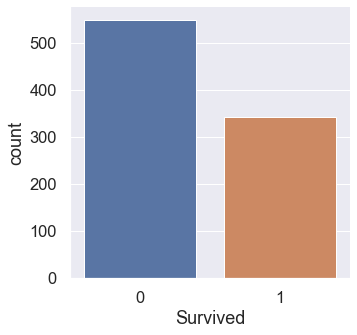

In [7]:
sns.catplot(data=df_train,x="Survived",kind="count")

## 학습에 불필요한 컬럼 제거 및 결측치, null 값 제거

In [8]:
train=df_train.drop(["Cabin","Embarked","Name","Ticket","PassengerId"],axis=1)
test=df_train.drop(["Cabin","Embarked","Name","Ticket"],axis=1)
train["Age"].fillna(train.groupby("Sex")["Age"].transform("mean"),inplace=True)
test["Age"].fillna(test.groupby("Sex")["Age"].transform("mean"),inplace=True)
test["Fare"].fillna(test.groupby("Sex")["Fare"].transform("median"),inplace=True)
print(train["Age"].value_counts())
train

30.726645    124
27.915709     53
24.000000     30
22.000000     27
18.000000     26
            ... 
55.500000      1
53.000000      1
20.500000      1
23.500000      1
0.420000       1
Name: Age, Length: 90, dtype: int64


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.000000,1,0,7.2500
1,1,1,female,38.000000,1,0,71.2833
2,1,3,female,26.000000,0,0,7.9250
3,1,1,female,35.000000,1,0,53.1000
4,0,3,male,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000
887,1,1,female,19.000000,0,0,30.0000
888,0,3,female,27.915709,1,2,23.4500
889,1,1,male,26.000000,0,0,30.0000


In [9]:
# 문자열로 미루어진 성별 컬럼은 숫자로 매핑
sex_mapping={"male":0,"female":1}
train["Sex"]=train["Sex"].map(sex_mapping)
test["Sex"]=test["Sex"].map(sex_mapping)

In [10]:
age_mean=train["Age"].mean()
age_std=train["Age"].std()
indexNames=train[train["Age"]<age_mean-3*age_std].index
train.drop(indexNames,inplace=True)
# age가 표준편차*3에 벗어난 데이터는 이상치로 취급하기
indexNames=train[train["Age"]>age_mean+3*age_std].index
train.drop(indexNames,inplace=True)
fare_mean=train["Fare"].mean()
fare_std=train["Fare"].std()
indexNames=train[train["Fare"]<fare_mean-3*fare_std].index
train.drop(indexNames,inplace=True)
indexNames=train[train["Fare"]>fare_mean+3*fare_std].index
train.drop(indexNames,inplace=True)
train.shape

(864, 7)

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
x_train=train.drop("Survived",axis=1).values
target_label=train["Survived"].values
x_test=test.values

In [12]:
x_train.shape,x_test.shape

((864, 6), (891, 8))

In [13]:
x_tr,x_vld,y_tr,y_vld=train_test_split(x_train,target_label,test_size=0.2,random_state=2020)
y_tr.shape,y_vld.shape

((691,), (173,))

## 로지스틱 회귀 모형 학습

In [14]:
model=LogisticRegression()
model.fit(x_tr,y_tr)
prediction=model.predict(x_vld)

In [15]:
prediction

array([1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0],
      dtype=int64)

In [16]:
print("Number of people:{}\naccuracy:{:.2f}%".format(y_vld.shape[0],100*accuracy_score(y_vld,prediction)))
confusion_matrix(y_vld,prediction)
# confusion_matrix(실제 값,예측 값)


Number of people:173
accuracy:78.03%


array([[94, 24],
       [14, 41]], dtype=int64)

## 로지스틱 회귀 모형 학습 결과

In [17]:
print("Precision: {:.2f}%\nRecall: {:.2f}%\nF1-score: {:.2f}%".format(100*precision_score(y_vld,prediction),100*recall_score(y_vld,prediction),100*f1_score(y_vld,prediction)))

Precision: 63.08%
Recall: 74.55%
F1-score: 68.33%


## ☆로지스틱 회귀 모형 성능 평가☆

[0,0] [0,1]

[1,0] [1,1]

tpr: 실제 맞다고 생각한 값에서 추측 성공한 경우: [0.0]/[0,0}+[0,1]

fpr: 실제 틀렸다고 생각한 값에서 추측 실패한 경우: [1.0]/[1,0}+[1,1]

밑의 내용은 i라는 cutoff value를 조절하면서 실제 tpr과 fpr 혹은 acc가 어떻게 달라지는 지 판별

In [18]:
list=[]
for i in np.linspace(0,1,100): # i는 cutoff value, 0과 1사이를 100등분하여 cutoff,
    # 예상치가 i를 넘는 것만 pred에 저장
    #,,? 그런데 어떻게 confusion matrix 만듦?
    # y_vld도 pred 에 따라 줄어드는 듯.
    pred=model.predict_proba(x_vld)[:,1]>i
    # predict_proba는 각 클래스의 반환 값이 아니라 확률값이 나옴,
    # cutoff value인 i보다 큰 확률로 결과값을 결정할 수 있는 결과값만 남기겠다.
    cf_mtx=confusion_matrix(y_vld,pred)
    #실제값과 예측 값을 대상으로 matrix 만들기
    print(cf_mtx)
    acc=accuracy_score(y_vld,pred)
    #acc를 계산하려면 예측값과 예측확률이 있어야.
    tpr=cf_mtx[0,0]/cf_mtx[0].sum()
    #실제 t인것중 t 비율
    fpr=cf_mtx[1,0]/cf_mtx[1].sum()
    f1=f1_score(y_vld,pred)
    list.append([i,acc,f1,tpr,fpr])

[[  0 118]
 [  0  55]]
[[  1 117]
 [  0  55]]
[[  1 117]
 [  0  55]]
[[  2 116]
 [  0  55]]
[[  2 116]
 [  0  55]]
[[  5 113]
 [  0  55]]
[[  6 112]
 [  1  54]]
[[  9 109]
 [  1  54]]
[[ 10 108]
 [  1  54]]
[[ 15 103]
 [  1  54]]
[[20 98]
 [ 1 54]]
[[34 84]
 [ 2 53]]
[[42 76]
 [ 3 52]]
[[43 75]
 [ 4 51]]
[[47 71]
 [ 4 51]]
[[51 67]
 [ 4 51]]
[[56 62]
 [ 4 51]]
[[58 60]
 [ 5 50]]
[[63 55]
 [ 5 50]]
[[65 53]
 [ 6 49]]
[[67 51]
 [ 6 49]]
[[69 49]
 [ 6 49]]
[[71 47]
 [ 6 49]]
[[73 45]
 [ 6 49]]
[[74 44]
 [ 6 49]]
[[74 44]
 [ 6 49]]
[[75 43]
 [ 6 49]]
[[77 41]
 [ 7 48]]
[[78 40]
 [ 7 48]]
[[78 40]
 [ 7 48]]
[[79 39]
 [ 8 47]]
[[79 39]
 [ 8 47]]
[[80 38]
 [ 8 47]]
[[81 37]
 [ 8 47]]
[[83 35]
 [ 8 47]]
[[85 33]
 [ 8 47]]
[[85 33]
 [ 8 47]]
[[87 31]
 [ 8 47]]
[[87 31]
 [ 8 47]]
[[88 30]
 [ 8 47]]
[[90 28]
 [10 45]]
[[91 27]
 [10 45]]
[[91 27]
 [10 45]]
[[91 27]
 [10 45]]
[[91 27]
 [10 45]]
[[92 26]
 [10 45]]
[[92 26]
 [12 43]]
[[93 25]
 [12 43]]
[[93 25]
 [12 43]]
[[93 25]
 [13 42]]
[[95 23]
 

In [19]:
cut_off=DataFrame(list)
cut_off.columns=['cutoff',"acc","f1","tpr","fpr"]

In [20]:
cut_off

,cutoff,acc,f1,tpr,fpr
0,0.000000,0.317919,0.482456,0.000000,0.000000
1,0.010101,0.323699,0.484581,0.008475,0.000000
2,0.020202,0.323699,0.484581,0.008475,0.000000
3,0.030303,0.329480,0.486726,0.016949,0.000000
4,0.040404,0.329480,0.486726,0.016949,0.000000
...,...,...,...,...,...
95,0.959596,0.687861,0.100000,0.983051,0.945455
96,0.969697,0.687861,0.100000,0.983051,0.945455
97,0.979798,0.676301,0.034483,0.983051,0.981818
98,0.989899,0.676301,0.000000,0.991525,1.000000


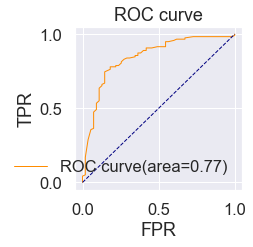

In [31]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thersholds=roc_curve(y_vld,prediction)
# 넓이
roc_auc=auc(fpr,tpr)

plt.figure(figsize=(3,3))
plt.plot(cut_off["fpr"],cut_off["tpr"],color="darkorange",lw=1,label="ROC curve(area=%.2f)"%roc_auc)
plt.plot([0,1],[0,1],color="navy",lw=1,linestyle="--")


# 그래프 서식
plt.title("ROC curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend(loc="lower right")

## accuracy가 최대가 되는 값

In [22]:
cut_off[cut_off["acc"]==cut_off["acc"].max()]
# acc가 최대가 되는 점 찾기

,cutoff,acc,f1,tpr,fpr
70,0.707071,0.803468,0.653061,0.90678,0.418182


In [23]:
cut_off_acc_max=cut_off[cut_off["acc"]==cut_off["acc"].max()]["cutoff"][70]
cut_off_acc_max
# acc가 최대가 될 때의 cutoff 값 구하기

0.7070707070707072

In [24]:
pred_acc_max=model.predict_proba(x_vld)[:,1]>cut_off_acc_max
# 예측치에서 cutoff값 넘는 것만 저장

In [25]:
confusion_matrix(y_vld,pred_acc_max)

array([[107,  11],
       [ 23,  32]], dtype=int64)

## f1-score이 최대가 되는 값

In [26]:
cut_off[cut_off["f1"]==cut_off["f1"].max()]

,cutoff,acc,f1,tpr,fpr
45,0.454545,0.791908,0.714286,0.779661,0.181818


In [27]:
cut_off_f1_max=cut_off[cut_off["f1"]==cut_off["f1"].max()]["cutoff"][45]
cut_off_f1_max

0.4545454545454546

In [28]:
pred_f1_max=model.predict_proba(x_vld)[:,1]>cut_off_f1_max

In [29]:
confusion_matrix(y_vld,pred_f1_max)

array([[92, 26],
       [10, 45]], dtype=int64)